# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [2]:
import main
import numpy as np
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


C:\Users\48693\Documents\GitHub\laboratorium-12-Wiktor010\main.py:22: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  ds = s[-1] + dt * np.array([j(t_span[i], s[-1]) for j in fun])
C:\Users\48693\Documents\GitHub\laboratorium-12-Wiktor010\main.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(s)


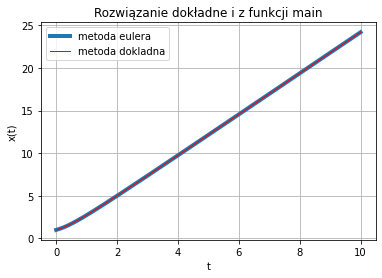

In [2]:
f_dok = lambda t : t+ np.sqrt(1+2*t**2)
t = np.linspace(0,10,1000)

def x_prim(t,x):
    return (x+t)/(x-t)
plt.plot(t,main.solve_euler(np.array([x_prim]),t,1),linewidth=4)
plt.plot(t,f_dok(t),'r',linewidth=1)
plt.legend(['metoda eulera','metoda dokladna'])
plt.grid(True)
plt.title('Rozwiązanie dokładne i z funkcji main')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

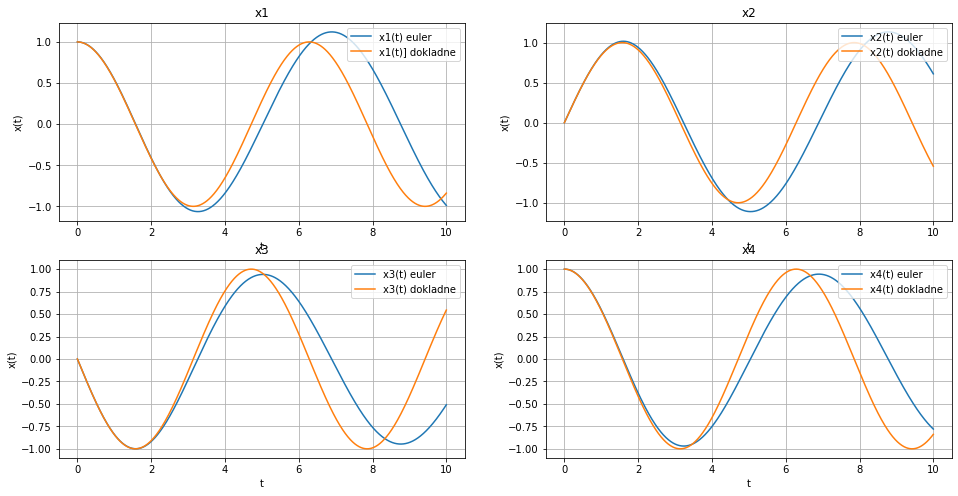

In [3]:
t = np.linspace(0,10,1000)
def x_1(t,x):
    x_1 = x[2]
    return x_1

def x_2(t,x):
    x_2 = x[3]
    return x_2

def x_3(t,x):
    x_3 = -x[0]/((x[0]**2+x[1]**2)**(3/2))
    return x_3

def x_4(t,x):
    x_4 = -x[1]/((x[0]**2+x[1]**2)**(3/2))
    return x_4

x_prims = np.array([x_1,x_2,x_3,x_4])

x0=np.array([1,0,0,1])
x=np.linspace(0,10,1000)
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(t,main.solve_euler(x_prims,t,x0)[:,0])
plt.plot(x,np.cos(x))
plt.legend(['x1(t) euler','x1(t)] dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x1')
plt.grid(True) 

plt.subplot(2,2,2)
plt.plot(t,main.solve_euler(x_prims,t,x0)[:,1])
plt.plot(x,np.sin(x))
plt.legend(['x2(t) euler','x2(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x2')
plt.grid(True)   


plt.subplot(2,2,3)
plt.plot(t,main.solve_euler(x_prims,t,x0)[:,2])
plt.plot(x,-np.sin(x))
plt.legend(['x3(t) euler','x3(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x3')
plt.grid(True)   

plt.subplot(2,2,4)
plt.plot(t,main.solve_euler(x_prims,t,x0)[:,3])
plt.plot(x,np.cos(x))
plt.legend(['x4(t) euler','x4(t) dokladne'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x4')
plt.grid(True)   

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

[[-667  333]
 [ 666 -334]]


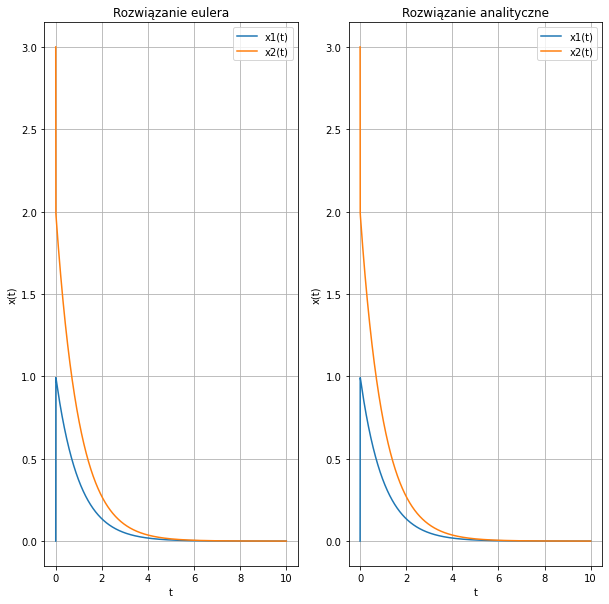

In [22]:
A = np.array([[-667,333],[666,-334]])
print(A)

def x1(t,x):
    return x[0]*A[0][0] + x[1]*A[0][1]

def x2(t,x):
    return x[0]*A[1][0]+x[1]*A[1][1]

t = np.linspace(0,10,100000)
x = np.linspace(0,10,100000)
x_prims = np.array([x1,x2])
x0 = np.array([0,3]).T
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(t,main.solve_euler(np.array(x_prims),t,x0)[:,0])
plt.plot(t,main.solve_euler(np.array(x_prims),t,x0)[:,1])
plt.legend(['x1(t)','x2(t)'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Rozwiązanie eulera')
plt.grid(True)
#-----Rozwiązanie analityczne----------------------------------
x1_fun = lambda t: np.exp(-t)-np.exp(-1000*t)
x2_fun = lambda t: 2*np.exp(-t)+np.exp(-1000*t)
plt.subplot(1,2,2)
plt.plot(t,x1_fun(t))
plt.plot(t,x2_fun(t))
plt.legend(['x1(t)','x2(t)'],loc='upper right')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Rozwiązanie analityczne')
plt.grid(True)

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

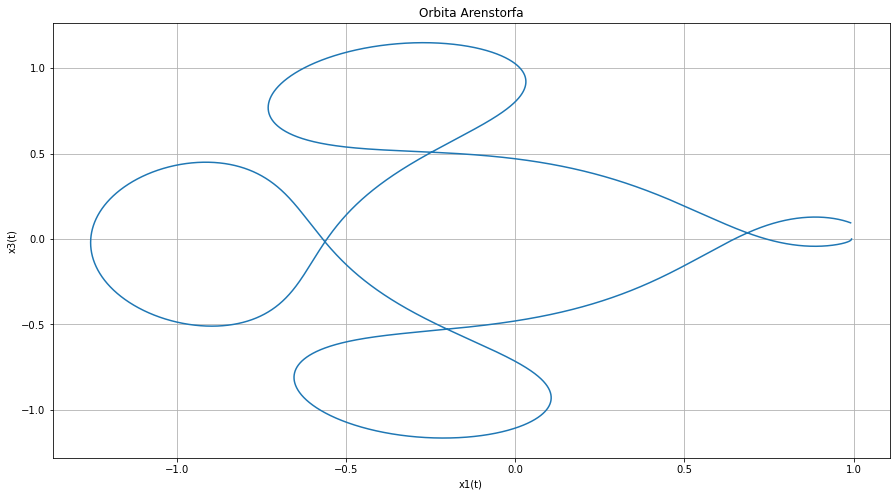

In [24]:
mi  = 0.012277471
mi_prim = 1 - mi
def D1(t,x):
    return ((x[0]+mi)**2+x[2]**2)**(3/2)

def D2(t,x):
    return ((x[0]-mi_prim)**2+x[2]**2)**(3/2)

def x1(t,x):
    return x[1]

def x2(t,x):
    return x[0] + 2* x[3] - mi_prim * (x[0]+mi)/D1(t,x) - mi * (x[0]-mi_prim)/D2(t,x)

def x3(t,x):
    return x[3]

def x4(t,x):
    return x[2] - 2 * x[1] - mi_prim * x[2]/D1(t,x) - mi * x[2]/D2(t,x)

orbits = np.array([x1,x2,x3,x4])
T = 17.0652165601579625588917206249
t = np.linspace(0, T, 1000000)  
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
plt.figure(figsize=(15, 8))
plt.plot(main.solve_euler(orbits,t,x0)[:,0],main.solve_euler(orbits,t,x0)[:,2])
plt.ylabel("x3(t)")
plt.xlabel("x1(t)")
plt.title('Orbita Arenstorfa')
plt.grid()


Wnioski:  
Celem zajęć było zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych zwyczajnych w postaci 𝑥˙(𝑡)=𝑓(𝑥(𝑡),𝑡). Rozwiązaniem układu równań  𝑥˙(𝑡)=𝐀𝑥(𝑡)  jest równanie  𝑥(𝑡)=𝑒^(𝐀(𝑡))*𝐶1 . Natomiast gdy występuje warunek początkowy  𝑥(𝑡0)=𝑥0 , to  𝑥(𝑡)=𝑒^(𝐀(𝑡−𝑡0))*𝑥0 . Dokładność rozwiązań jest uzależniona w dużej mierze od ilości kroków użytych w wektorze czasu.Dla tysiąca kroków nasze rozwiązanie odbiega od dokładnego. Orbita Arenstorfa staje się dokładna dopiero dla 1000000 kroków. Na zajęciach korzystałem z metody eulera, którą zaimplementowałem w mainie Ćwiczenia te również pozwoliły mi przećwiczyć bibliotekę matplotlip do rysowania wykresów oraz niezbędną do wykonywania obliczeń nuemrycznych biblioteki numpy.


**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
